In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
df = spark.read.csv('data/BenefitsCostSharing.csv', header=True, inferSchema=True)

In [4]:
df.show(5)

+--------------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------------+----------+--------------------+-------------------+---------+-----+-----------------+-----------------+--------------+----------------+----------------+--------+---------+--------+--------------------+-----------+-----------------+---------------+---------+----------+-------------------+---------+----------+----------+
|         BenefitName|BusinessYear|CoinsInnTier1|CoinsInnTier2|CoinsOutofNet|CopayInnTier1|CopayInnTier2|CopayOutofNet|        EHBVarReason|Exclusions|         Explanation|         ImportDate|IsCovered|IsEHB|IsExclFromInnMOOP|IsExclFromOonMOOP|IsStateMandate|IsSubjToDedTier1|IsSubjToDedTier2|IssuerId|IssuerId2|LimitQty|           LimitUnit|MinimumStay|           PlanId|QuantLimitOnSvc|RowNumber|SourceName|StandardComponentId|StateCode|StateCode2|VersionNum|
+--------------------+------------+-------------+-------------+-------------

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df= pd.read_csv('data/BenefitsCostSharing.csv',low_memory=False)

After exploring the data, I found out that there are many types of benefit only have lesss than 20 cases. Therefore, to analyze in a more efficient way, I decided to only take the top 20 most used benefits to perform analysis in this project.

In [7]:
top20_benefit = df['BenefitName'].value_counts()[:20]
top20_benefit.index.values


array(['Orthodontia - Adult', 'Accidental Dental',
       'Routine Dental Services (Adult)', 'Dental Check-Up for Children',
       'Major Dental Care - Adult', 'Major Dental Care - Child',
       'Basic Dental Care - Adult', 'Basic Dental Care - Child',
       'Orthodontia - Child',
       'Treatment for Temporomandibular Joint Disorders',
       'Hospice Services', 'Urgent Care Centers or Facilities',
       'Private-Duty Nursing', 'Prosthetic Devices', 'Hearing Aids',
       'Routine Foot Care', 'Imaging (CT/PET Scans, MRIs)',
       'Primary Care Visit to Treat an Injury or Illness',
       'Abortion for Which Public Funding is Prohibited',
       'Infusion Therapy'], dtype=object)

In [8]:
df = df.loc[df['BenefitName'].isin(top20_benefit.index.values)]
df

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048403,Major Dental Care - Child,2016,50% Coinsurance after deductible,NaN,50% Coinsurance after deductible,Not Applicable,NaN,Not Applicable,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,112,SERFF,96480WV0110003,WV,WV,2
5048404,Basic Dental Care - Adult,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,113,SERFF,96480WV0110003,WV,WV,2
5048405,Orthodontia - Adult,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,114,SERFF,96480WV0110003,WV,WV,2
5048406,Major Dental Care - Adult,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,96480WV0110003-00,NaN,115,SERFF,96480WV0110003,WV,WV,2


In [9]:
df.IsCovered.value_counts()

Covered        768842
Not Covered    534786
Not covered       387
Name: IsCovered, dtype: int64

Found out that there is two types of values meaning Not covered in the column. Thus, it needed to be convert to just one value, which is "Not Covered".

In [10]:
df['IsCovered'].replace({'Not covered':'Not Covered'},inplace=True)
df['IsCovered'].value_counts()

Covered        768842
Not Covered    535173
Name: IsCovered, dtype: int64

In [11]:
df.shape

(1418957, 32)

In [12]:
df.isna().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1           650115
CoinsInnTier2          1330521
CoinsOutofNet           650115
CopayInnTier1           650115
CopayInnTier2          1330521
CopayOutofNet           650115
EHBVarReason            852514
Exclusions             1328921
Explanation            1211777
ImportDate                   0
IsCovered               114942
IsEHB                   663999
IsExclFromInnMOOP       564611
IsExclFromOonMOOP       563928
IsStateMandate         1369861
IsSubjToDedTier1        890570
IsSubjToDedTier2        890845
IssuerId                     0
IssuerId2                    0
LimitQty               1304498
LimitUnit              1304254
MinimumStay            1418786
PlanId                       0
QuantLimitOnSvc        1080816
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

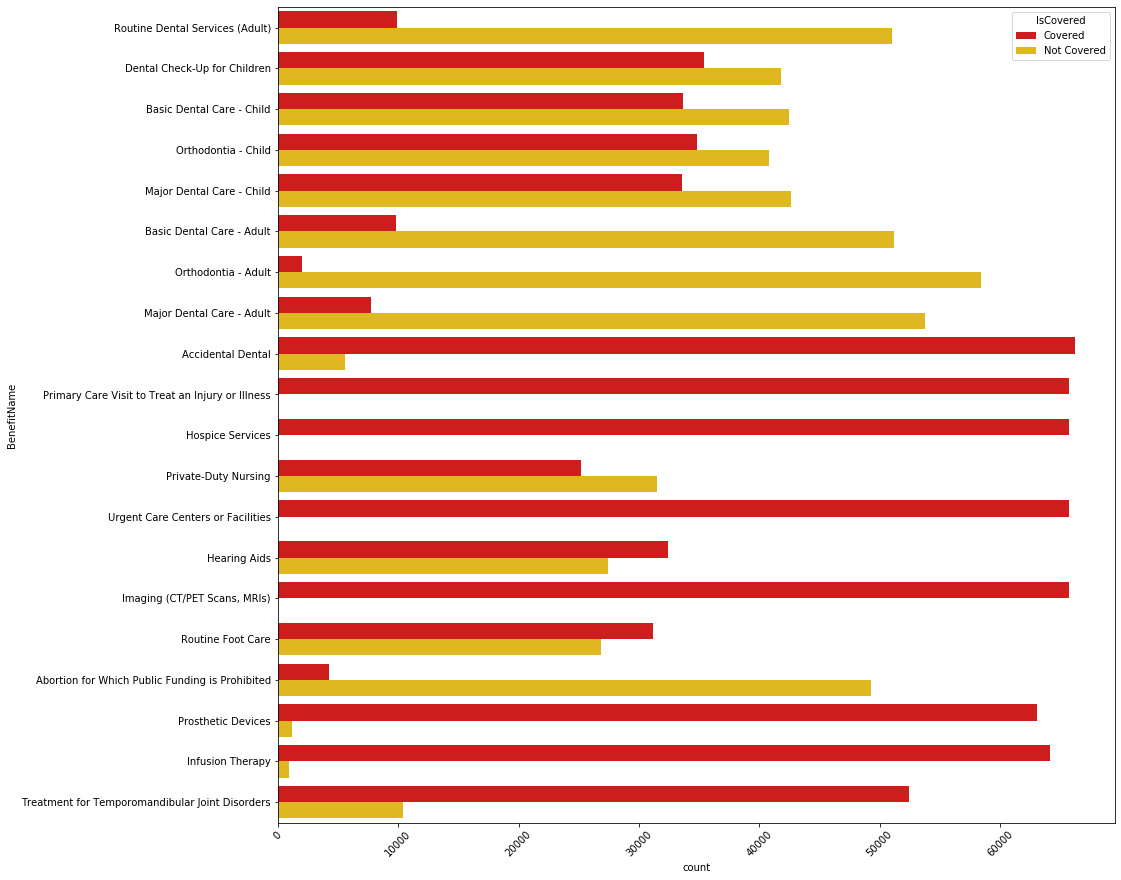

In [13]:
import seaborn as sns

plt.figure(figsize=(15,15))

sns.countplot(y='BenefitName', hue='IsCovered', data=df, palette='hot')
plt.xticks(rotation= 45)
plt.show()

As we can see from the above bar chart, dental cares took most of the cases on these top20 benefits kind. Further, insurnace do not cover most of these dental cares, except for the accidnetal dental care is covered in most of the cases. It may because that many childeren and adults are getting there teeth fixed, however, in most cases these circumstances are not urgent or neccessary, thus, it is reasonable for insurance to put their sources on those cases who injured on their teeth from accidents and needed to be cured immediately.

In [14]:
numeric_columns=['LimitQty','MinimumStay','VersionNum']
LABELS = ['IsCovered','BusinessYear']


 #### split the data into a training set and a test set

In [15]:
from sklearn.model_selection import train_test_split


# create the new DataFrame: numeric_data_only
numeric_data_only = df[numeric_columns].fillna(0)

# get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(numeric_data_only,
                                                    label_dummies)
                                                            

# print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064217 entries, 1160836 to 1534260
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   LimitQty     1064217 non-null  float64
 1   MinimumStay  1064217 non-null  float64
 2   VersionNum   1064217 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 32.5 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354740 entries, 362220 to 965995
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LimitQty     354740 non-null  float64
 1   MinimumStay  354740 non-null  float64
 2   VersionNum   354740 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 10.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064217 entries, 1160836 to 1534260
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype
---  --

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418957 entries, 0 to 5048407
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BenefitName          1418957 non-null  object 
 1   BusinessYear         1418957 non-null  int64  
 2   CoinsInnTier1        768842 non-null   object 
 3   CoinsInnTier2        88436 non-null    object 
 4   CoinsOutofNet        768842 non-null   object 
 5   CopayInnTier1        768842 non-null   object 
 6   CopayInnTier2        88436 non-null    object 
 7   CopayOutofNet        768842 non-null   object 
 8   EHBVarReason         566443 non-null   object 
 9   Exclusions           90036 non-null    object 
 10  Explanation          207180 non-null   object 
 11  ImportDate           1418957 non-null  object 
 12  IsCovered            1304015 non-null  object 
 13  IsEHB                754958 non-null   object 
 14  IsExclFromInnMOOP    854346 non-null   object 
 15

In [17]:
# Fill empty and NaNs values with NaN
df = df.fillna(np.nan)

In [18]:
# define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# convert IsCovered to a categorical type
df['IsCovered'] = df[['IsCovered']].apply(categorize_label,axis=0)

# Print the converted dtypes
print(df['IsCovered'].dtypes)

object


In [19]:
dummies = pd.get_dummies(df[['IsCovered']], prefix_sep='_')
dummies.head(2) 

,IsCovered_Covered,IsCovered_Not Covered
0,1,0
1,1,0


To know if the categorical columns have the correct type of value, I make a bar plot for category columns to take a look at how many categories are there in each column.

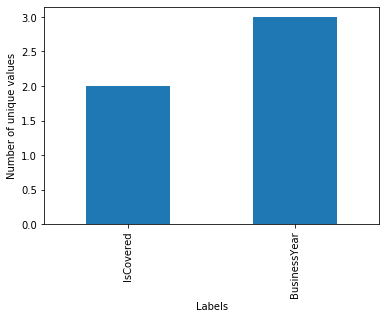

In [20]:
# Calculate number of unique values for each label
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

In [21]:
# show which benefit type have the most cases in the given business year
df[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                   
                   count unique                  top   freq
BusinessYear                                               
2014              335528     20  Orthodontia - Child  18719
2015              578188     20  Orthodontia - Adult  31269
2016              505241     20  Orthodontia - Adult  27389

In [22]:
# count the cases in each state
State = df.StateCode.unique()
benefit = [ ]

for state in State:
    state_benefit = len(df[df["StateCode"] == state])    
    benefit.append(state_benefit)   
    
    
print(benefit)

[12541, 9837, 61851, 97529, 52673, 42397, 26146, 27602, 13356, 27264, 15762, 23081, 38881, 77241, 32919, 38589, 122264, 139411, 13764, 19015, 9818, 82592, 19122, 17487, 57172, 17988, 12545, 15768, 40086, 10278, 31922, 8291, 20866, 95141, 14583, 28758, 16950, 25487, 1980]


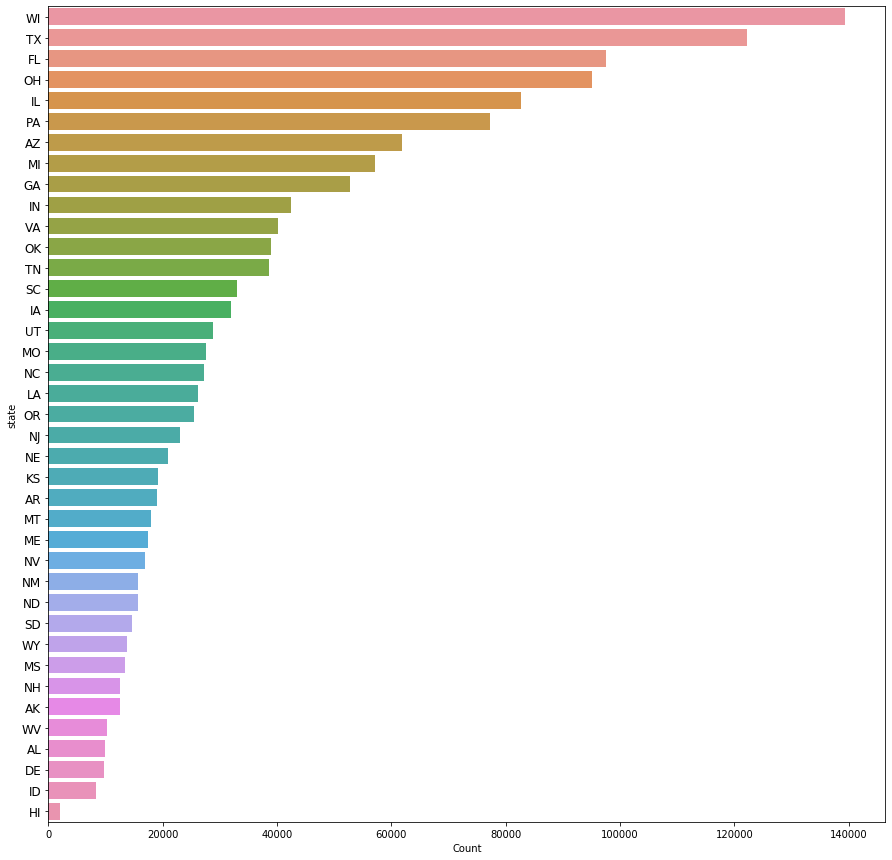

In [23]:
import seaborn as sns

# zip these two variables to one dataframe to create further visualization
plot_state_count = pd.DataFrame(
    {'state': State,
     'Count' : benefit
     })

plot_state_count = plot_state_count.sort_values('Count', ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(plot_state_count.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = plot_state_count['state'], x= plot_state_count['Count'])
plt.show()

In [24]:
# see the top benefit type for each state
df[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              12541     20        Basic Dental Care - Child   720
AL               9837     20                Accidental Dental   653
AR              19015     20              Orthodontia - Adult  1077
AZ              61851     20              Orthodontia - Child  3345
DE               9818     20                Accidental Dental   602
FL              97529     20  Routine Dental Services (Adult)  5130
GA              52673     20              Orthodontia - Child  2893
HI               1980     20  Routine Dental Services (Adult)   110
IA              31922     20  Routine Dental Services (Adult)  1727
ID               8291     20                Accidental Dental   447
IL              82592     20  Routine Dental Services (Adult)  4299
IN              42397     20              Orthodontia - Child  2347
KS              19122     20        Basic Dental Care - Child  1087
LA              26146     20  Routine Dental Services (Adult)  1491
ME              17487     20        Basic Dental Care - Child   975
MI              57172     20              Orthodontia - Child  3248
MO              27602     20  Routine Dental Services (Adult)  1577
MS              13356     20        Basic Dental Care - Child   725
MT              17988     20        Basic Dental Care - Child  1049
NC              27264     20  Routine Dental Services (Adult)  1537
ND              15762     20        Basic Dental Care - Child   974
NE              20866     20  Routine Dental Services (Adult)  1238
NH              12545     20        Basic Dental Care - Child   707
NJ              23081     20  Routine Dental Services (Adult)  1357
NM              15768     20        Basic Dental Care - Child   828
NV              16950     20        Basic Dental Care - Child   930
OH              95141     20  Routine Dental Services (Adult)  5092
OK              38881     20  Routine Dental Services (Adult)  2136
OR              25487     20              Orthodontia - Adult  1344
PA              77241     20              Orthodontia - Child  4208
SC              32919     20  Routine Dental Services (Adult)  1817
SD              14583     20        Basic Dental Care - Child   843
TN              38589     20  Routine Dental Services (Adult)  2073
TX             122264     20  Routine Dental Services (Adult)  6441
UT              28758     20  Routine Dental Services (Adult)  1527
VA              40086     20  Routine Dental Services (Adult)  2256
WI             139411     20  Routine Dental Services (Adult)  7135
WV              10278     20        Basic Dental Care - Child   625
WY              13764     20        Basic Dental Care - Child   807

As we can see from the above dataframe, most cases are Orthodontia - Child. And for those not Orthodontia - Child as thier top cases, they are also dental care related.

Data process the column CoinsOutofNet to change string value to zero and only contain integer value in the column to make a bar plot for visualization.

In [25]:
df["CoinsOutofNet"] = df["CoinsOutofNet"].str.split("%").str[0]

In [26]:
df['CoinsOutofNet'].replace({"No Charge":0, "No Charge after deductible":0, "Not Applicable":0,"$0":0}, inplace=True)

In [27]:
df.loc[df['CoinsOutofNet'].notnull(), 'CoinsOutofNet'] = df.loc[df['CoinsOutofNet'].notnull(), 'CoinsOutofNet'].astype(int)

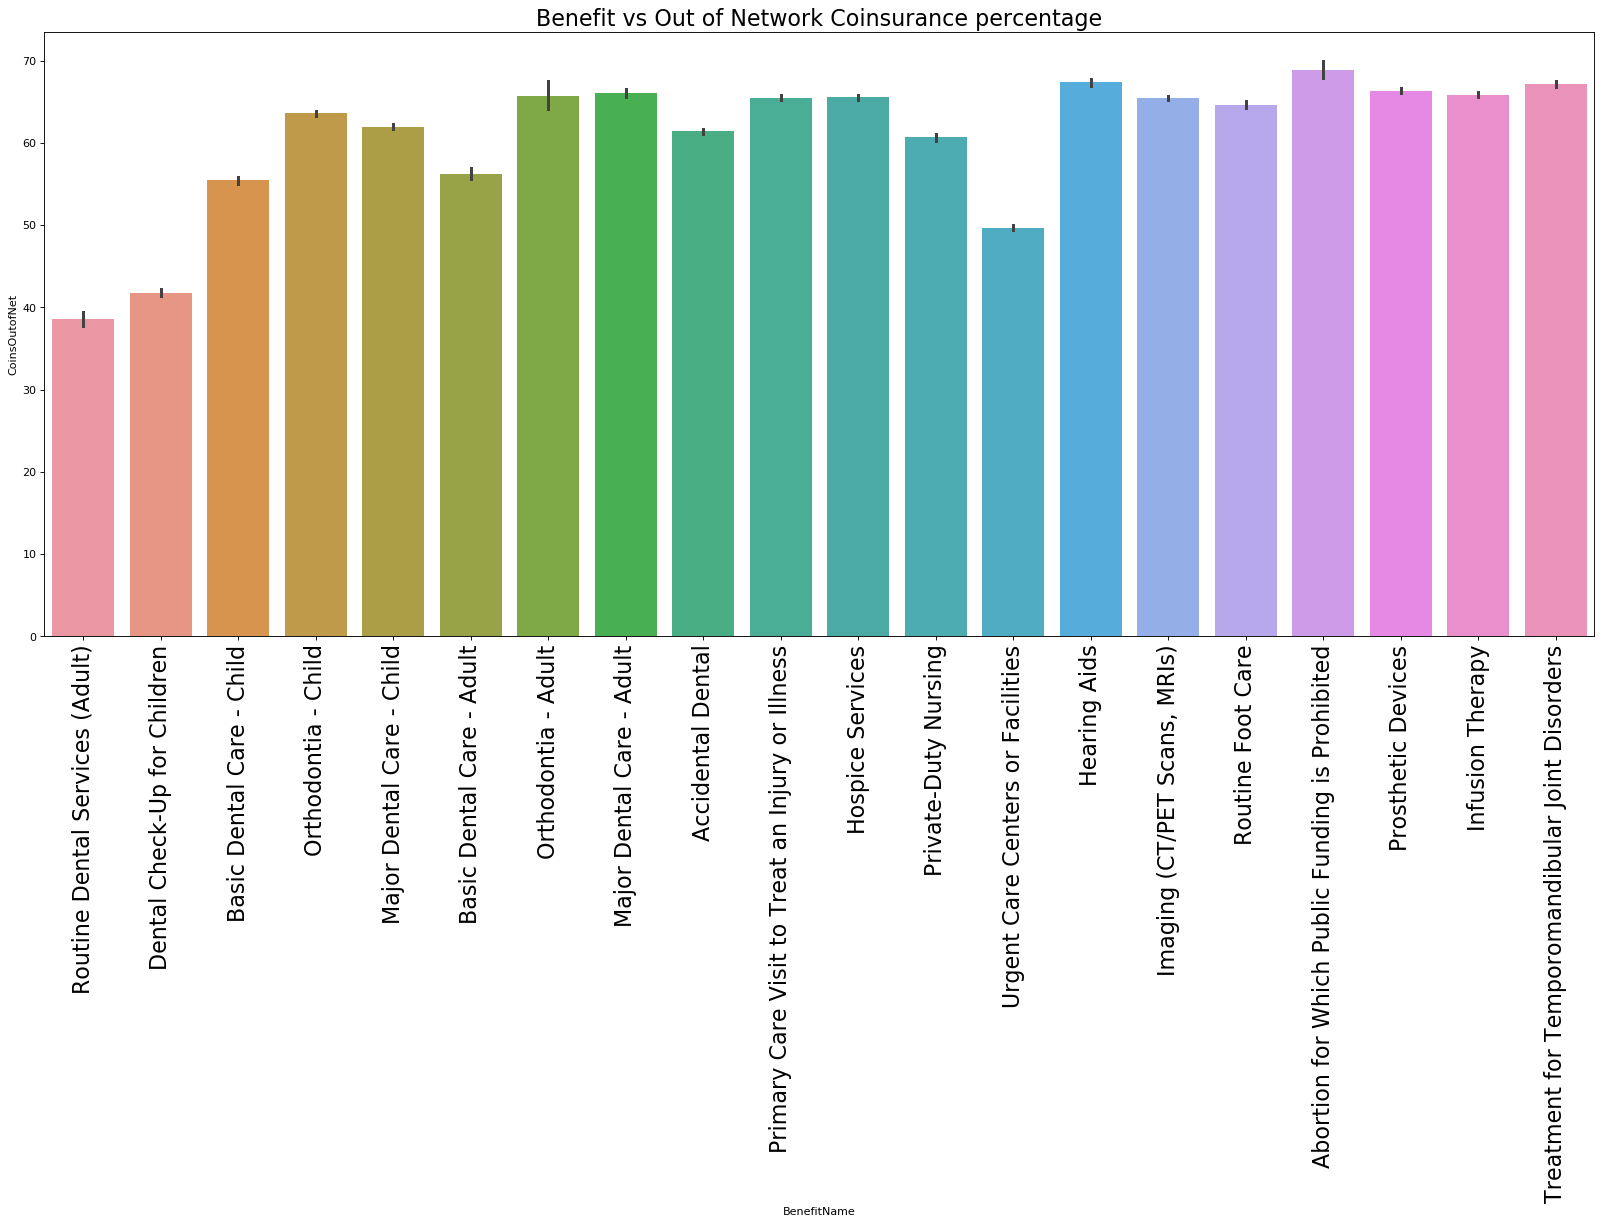

In [28]:
# get a look at the percetage of out of Network coinsurance percentage

from matplotlib.pyplot import figure
import seaborn as sns

figure(figsize=(25, 10), dpi=80)

sns.barplot(df['BenefitName'], df['CoinsOutofNet'])
plt.title('Benefit vs Out of Network Coinsurance percentage', fontsize = 20)
plt.xticks(rotation= 90,fontsize=20)

plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418957 entries, 0 to 5048407
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   BenefitName          1418957 non-null  object 
 1   BusinessYear         1418957 non-null  int64  
 2   CoinsInnTier1        768842 non-null   object 
 3   CoinsInnTier2        88436 non-null    object 
 4   CoinsOutofNet        768842 non-null   object 
 5   CopayInnTier1        768842 non-null   object 
 6   CopayInnTier2        88436 non-null    object 
 7   CopayOutofNet        768842 non-null   object 
 8   EHBVarReason         566443 non-null   object 
 9   Exclusions           90036 non-null    object 
 10  Explanation          207180 non-null   object 
 11  ImportDate           1418957 non-null  object 
 12  IsCovered            1304015 non-null  object 
 13  IsEHB                754958 non-null   object 
 14  IsExclFromInnMOOP    854346 non-null   object 
 15

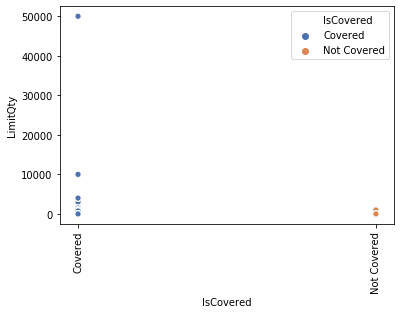

In [30]:
#plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x="IsCovered", y="LimitQty", hue="IsCovered", palette="deep")
plt.xticks(rotation=90)
plt.show()

No handles with labels found to put in legend.


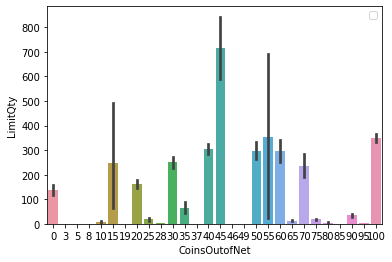

In [38]:
sns.barplot(data = df,y=df["LimitQty"],x=df['CoinsOutofNet'])
plt.legend()
plt.show()

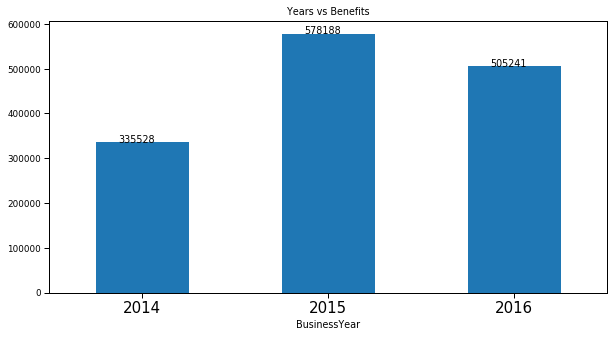

In [64]:
# visualize on how many occurances of benefits are there in each business year
sns.set_context('paper')
plt.figure(figsize=(10,5))
ax = df.groupby('BusinessYear')['BenefitName'].count().plot.bar()
plt.title('Years vs Benefits')
plt.xticks(fontsize = 15, rotation = 360)

# add numeric label to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.12, p.get_height()+100))

As we see from the above bar plot on business vs occurance of benefits, year 2015 had the most occurnace of benefits compared to 2014 and 2016. 